In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [3]:
# load data
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [5]:
df['label'] = iris.target
df.columns = ['sepal length','sepal width','petal length','petal width','label']
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


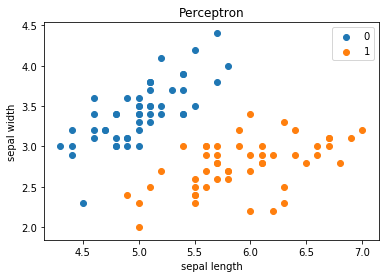

In [6]:
#数据可视化
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label = '0') #label为0的鸢尾花
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label = '1') #label为1的鸢尾花
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Perceptron')
plt.legend()

In [63]:
#数据准备
data = np.array(df.iloc[:100,[0,1,-1]]) #只取前100行的前两列和最后一列
X = data[:,[0,1]]
y = data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y]) #将label转换为1 ，-1
data[0]

array([5.1, 3.5, 0. ])

 Perceptron

In [64]:
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1) #(2,1)
        self.b = 0 
        self.lr = 0.1
        
    def fx(self, x, w, b):
        y = np.dot(x,w) + b
        return y 
    
    #随机梯度下降法 
    def SGD(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0 
            for i in range(len(X_train)):
                X = X_train[i] #(1,2)
                y = y_train[i] #(1,1)
                if y*self.fx(X, self.w, self.b) <= 0:
                    self.w = self.w + self.lr*np.dot(y,X)
                    self.b = self.b + self.lr*y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return "Perceptron Model!"

In [65]:
#实例化类
P = Model()
P.SGD(X, y)
print(P.w[0],P.w[1])

7.799999999999906 -10.000000000000105


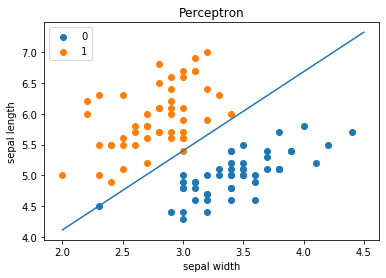

In [81]:
#分类结果可视化
x_points = np.linspace(2,4.5,10)
y = -(P.w[1]*x_points + P.b)/P.w[0]
plt.plot(x_points,y)
plt.scatter(df[:50]['sepal width'],df[:50]['sepal length'],label = '0')
plt.scatter(df[50:100]['sepal width'],df[50:100]['sepal length'],label = '1')
plt.xlabel("sepal width")
plt.ylabel("sepal length")
plt.title('Perceptron')
plt.legend()